<a href="https://colab.research.google.com/github/Bergu1/neural-network-project/blob/main/neural_network_project3NowaBaza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import kagglehub
import os
import random

### Sprawdzenie czy mamy możliwość skorzystania z GPU

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

###Pobieramy baze danych z kaggla

In [2]:
path = kagglehub.dataset_download("utkarshsaxenadn/fruits-classification")

print("Path to dataset files:", path)

100%|██████████| 84.8M/84.8M [00:01<00:00, 63.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/utkarshsaxenadn/fruits-classification/versions/1


###Tworzymy główny katalog na dane

In [4]:
from pathlib import Path

In [5]:
path = '/root/.cache/kagglehub/datasets/utkarshsaxenadn/fruits-classification/versions/1'
output_path = '/content/Fruits Classification'
os.makedirs(f"{output_path}", exist_ok=True)
output_path = Path(output_path)
output_path

PosixPath('/content/Fruits Classification')

In [9]:
shutil.copytree(path, output_path)

PosixPath('/content/Fruits Classification')

Sprawdzamy jakie mamy dostępne dane w naszej bazie z kaggla


In [6]:
files = os.listdir(path)
print("Files in the dataset folder:", files)

Files in the dataset folder: ['Fruits Classification']


#!!!!!!!!!!!!! Usuwanie folderów !!!!!!!!!!!!!!!!

In [7]:
import shutil

In [ ]:
for item in os.listdir(output_path):
    item_path = os.path.join(output_path, item)
    if os.path.isdir(item_path):
        shutil.rmtree(item_path)

# Pobieranie danych i kopiowanie do konkretnych utworzonych przez nas folderów
w poniższym przypadku mamy tylko podział na test i train gdybyśmy chcieli mieć podział na test train i validation należało by to zrobić tak:

Najpierw dzielimy dane na zestaw treningowy oraz pozostały (test + walidacja):

**train_images, remaining_images = train_test_split(images, train_size=train_size, random_state=42)**

Następnie dzielimy pozostały zbiór na test i walidację:

**test_images, validation_images = train_test_split(remaining_images, test_size=validation_size, random_state=42)**

Do tych folderów przypisywane są same nazwy obrazków na podstawie których będziemy kopiować dane z datasetu.

In [ ]:
categories = ['Banana', 'Peach', 'Orange', 'Pitaya', 'Plum', 'Tomatoes', 'Kiwi/kiwi A', 'Apple/Apple C']
train_size = 800
test_size = 200

In [ ]:
os.makedirs(f"{output_path}/train", exist_ok=True)
os.makedirs(f"{output_path}/test", exist_ok=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
for category in categories:
  category_path = os.path.join(path, category)
  train_category_path = os.path.join(output_path, 'train', category)
  test_category_path = os.path.join(output_path, 'test', category)

  os.makedirs(train_category_path, exist_ok=True)
  os.makedirs(test_category_path, exist_ok=True)

  images = os.listdir(category_path)
  train_images, test_images = train_test_split(images, train_size=train_size, test_size=test_size, random_state=42)

  for img in train_images:
      shutil.copy(os.path.join(category_path, img), os.path.join(train_category_path, img))

  for img in test_images:
      shutil.copy(os.path.join(category_path, img), os.path.join(test_category_path, img))

In [ ]:
random.seed(42)

image_path_list = list(output_path.glob("*/*/*.png")) # Lista wszystkich obrazków

In [ ]:
# Funkcja do usuwania ukrytych folderów
def remove_hidden_folders(path):
    for root, dirs, files in os.walk(path):
        for folder in dirs:
            if folder.startswith("."):  # Ukryte foldery zaczynają się od "."
                folder_path = os.path.join(root, folder)
                print(f"Usuwam ukryty folder: {folder_path}")
                shutil.rmtree(folder_path)

# Ścieżka do głównego folderu
dataset_path = "/content/fruits"
remove_hidden_folders(dataset_path)

Usuwam ukryty folder: /content/fruits/train/.ipynb_checkpoints
Usuwam ukryty folder: /content/fruits/train/Kiwi/.ipynb_checkpoints


In [ ]:
import os
print(os.listdir(output_path / "train"))

['Kiwi', 'Plum', 'Apple ', 'Pitaya', 'Orange', 'Banana', 'Peach', 'Tomatoes']


Wyswietlanie obrazka 1. Metoda

In [ ]:
from PIL import Image

Random image path: /content/banana_peach_orange/test/peach/Peach001664.png
Image class: peach
Image height: 258
Image width: 320


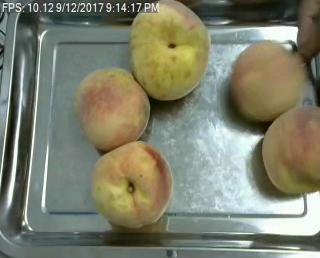

In [ ]:
random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem # przypisanie do zmiennej rodzaju owocu losowego obrazka

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Otwieranie obrazka 2. metoda

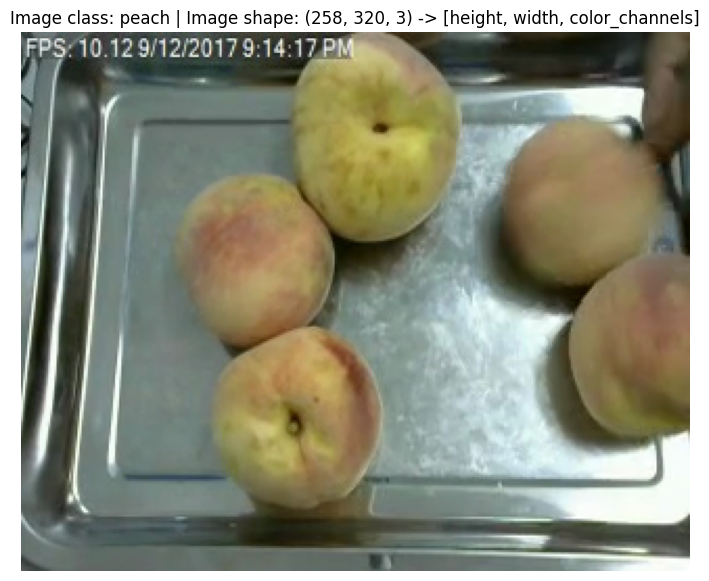

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);

Tworzenie pierwszego data_trasforma, który ostatecznie nie jest wykorzystywany, powstał w celu nauki. Służy on do przetwarzania obrazka na tensory o rozmiarze 64 na 64 z 50% prawdopodobieństwem obrotu

In [ ]:
data_transform = transforms.Compose([
    # zmiana rozmiaru obrazu na 64x64
    transforms.Resize(size=(64, 64)),
    # Losowy obrót obrazu
    transforms.RandomHorizontalFlip(p=0.5), # prawdopodobieństwo obrotu 50%
    # Przekształcenie obrazu w tensor
    transforms.ToTensor()
])

Wizualizacja działania transformacji

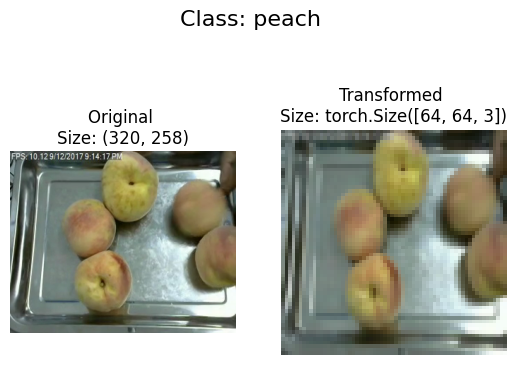

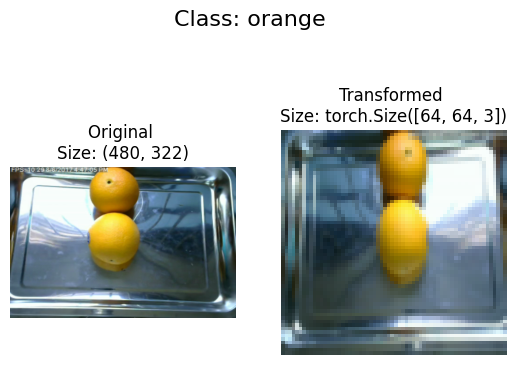

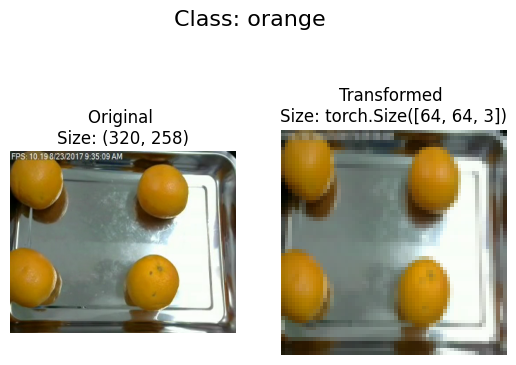

In [ ]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    # losujemy trzy losowe obrazki
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        # każdy z obrazków otwieramy jako f
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # każdy obrazek przekształcamy w tensor a następnie zamieniamy kolejność channeli w pytorchu
            # jest colour high i width a my chcemy high width colour
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

#Ponowny kod zamiany obrazków na tensory tym razem będzie on już wykorzystywany do nauki oraz testowania naszego modelu

In [10]:
import torchvision.transforms as transforms

train_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Zmiana obrazków w DataSet

In [11]:
import torchvision.datasets as datasets

train_data = datasets.ImageFolder(root=output_path / "train",
                                  transform=train_transforms,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=output_path / "test",
                                 transform=test_transforms)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 9700
    Root location: /content/Fruits Classification/train
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 100
    Root location: /content/Fruits Classification/test
    StandardTransform
Transform: Compose(
               Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [12]:
# Otrzymanie klas jako lisa
class_names = train_data.classes
# Otrzymanie klas jako slownik
class_dict = train_data.class_to_idx

class_names, class_dict

(['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry'],
 {'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4})

In [ ]:
len(train_data), len(test_data)

(6400, 1600)

### Patrzymy na wybrany element w DataSecie

In [ ]:
img, label = train_data[2300][0], train_data[2300][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.2039, 0.2667, 0.3059,  ..., 0.7569, 0.5412, 0.4235],
         [0.3490, 0.4314, 0.5490,  ..., 0.8078, 0.7020, 0.4471],
         [0.2667, 0.3922, 0.4627,  ..., 0.5922, 0.8078, 0.6275],
         ...,
         [0.4863, 0.4706, 0.4588,  ..., 0.8902, 0.9020, 0.9294],
         [0.4431, 0.4588, 0.4549,  ..., 0.9686, 0.9686, 0.9686],
         [0.2392, 0.2706, 0.2667,  ..., 0.9098, 0.8784, 0.8078]],

        [[0.2314, 0.2824, 0.3255,  ..., 0.8118, 0.5961, 0.4784],
         [0.3804, 0.4510, 0.5765,  ..., 0.8627, 0.7569, 0.5020],
         [0.2980, 0.4196, 0.4980,  ..., 0.6392, 0.8510, 0.6706],
         ...,
         [0.5294, 0.5176, 0.5059,  ..., 0.9098, 0.9216, 0.9529],
         [0.4863, 0.5020, 0.4980,  ..., 0.9961, 0.9961, 0.9961],
         [0.2902, 0.3294, 0.3176,  ..., 0.9373, 0.9059, 0.8353]],

        [[0.2275, 0.2784, 0.3176,  ..., 0.8039, 0.5843, 0.4706],
         [0.3804, 0.4392, 0.5686,  ..., 0.8471, 0.7412, 0.4902],
         [0.2863, 0.3922, 0.4863,  ..., 0.61

Wyświetlamy dany element pamiętając o kolejności channeli

In [ ]:
img_permute = img.permute(1, 2, 0)

print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label], fontsize=14);

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


NameError: name 'plt' is not defined

# Zmiana obrazka w Dataloader


In [13]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=os.cpu_count(),
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=os.cpu_count(),
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7ab968e48040>,
 <torch.utils.data.dataloader.DataLoader at 0x7ab968e4a1d0>)

Patrzymy na poszczególny element dataloadera

In [ ]:
img, label = next(iter(train_dataloader)) # iter iteruje 75 batchy a next bierze pierwszy zestaw 32 elementowy

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


#TinyVGG model

In [14]:
from torch import nn

In [ ]:
device = "cpu" # w darmowej wersji Google Colab jest limit na GPU

Tworzymy model który składa się z dwóch bloków konwolucyjnych oraz bloku klasyfikującego

In [29]:
class FruitRecognitionModel(nn.Module):
  def __init__ (self, input_shape: int, hidden_units: int, output_shape: int) -> None:
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape, # liczba channeli kolorów RGB
                    out_channels=hidden_units,
                    kernel_size=3, # okienko 3 na 3 przejścia przez pixele
                    stride=1, # co ile pixeli przechodzisz
                    padding=0, # obramówka obrazu
                    ),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=0),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,
                      stride=2),
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=0),
          nn.ReLU(),
          nn.MaxPool2d(2)
          )

      # Funkcja klasyfikująca dane wyjściowe do klas jakie mamy
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*29*29,
                    out_features=output_shape)
          )

  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_0 = FruitRecognitionModel(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=40, # liczba neuronów w poszczególnej warstwie
                  output_shape=len(train_data.classes)).to(device)
model_0

FruitRecognitionModel(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 40, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(40, 40, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=33640, out_features=5, bias=True)
  )
)

In [ ]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[0.0134, 0.0204, 0.0171, 0.0187, 0.0084, 0.0336, 0.0102, 0.0775]],
       device='cuda:0')

Output prediction probabilities:
tensor([[0.1235, 0.1244, 0.1240, 0.1242, 0.1229, 0.1261, 0.1231, 0.1317]],
       device='cuda:0')

Output prediction label:
tensor([7], device='cuda:0')

Actual label:
6


In [41]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

RuntimeError: Failed to run torchinfo. See above stack traces for more details. Executed layers up to: [Sequential: 1, Conv2d: 2, ReLU: 2, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Sequential: 1, Conv2d: 2, ReLU: 2, Conv2d: 2, ReLU: 2, MaxPool2d: 2, Flatten: 2]

Inicjalizujemy nasze loss_function oraz naszego optimizera

In [30]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

In [31]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward() # propagacja wsteczna błędu

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

Wstępne analizowanie przebiegu trenowania

In [ ]:
for train in range(10):
  train_loss, train_acc = train_step(model_0, train_dataloader, loss_fn, optimizer)
  print(f"Epoch: {train} Loss {train_loss} Accuracy: {train_acc}")

In [32]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


In [ ]:
test_loss, test_acc = test_step(model_0, train_dataloader, loss_fn)
print(f"Loss {test_loss} Accuracy: {test_acc}")

### Ostateczna funkcja uczenia

In [33]:
from tqdm.auto import tqdm

In [34]:
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001),
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 50):

    results = {"train_loss": [],
              "train_acc": [],
              "test_loss": [],
              "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)

        test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )


        results["train_loss"].append(train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss)
        results["train_acc"].append(train_acc.item() if isinstance(train_acc, torch.Tensor) else train_acc)
        results["test_loss"].append(test_loss.item() if isinstance(test_loss, torch.Tensor) else test_loss)
        results["test_acc"].append(test_acc.item() if isinstance(test_acc, torch.Tensor) else test_acc)

    return results

In [ ]:
train(model_0, train_dataloader, test_dataloader)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3811 | train_acc: 0.3929 | test_loss: 1.2722 | test_acc: 0.4844
Epoch: 2 | train_loss: 1.2661 | train_acc: 0.4546 | test_loss: 1.1216 | test_acc: 0.6406
Epoch: 3 | train_loss: 1.1784 | train_acc: 0.5027 | test_loss: 1.1764 | test_acc: 0.5078
Epoch: 4 | train_loss: 1.1322 | train_acc: 0.5255 | test_loss: 0.9637 | test_acc: 0.4922
Epoch: 5 | train_loss: 1.1086 | train_acc: 0.5455 | test_loss: 1.1534 | test_acc: 0.5859
Epoch: 6 | train_loss: 1.0951 | train_acc: 0.5484 | test_loss: 1.0853 | test_acc: 0.5156
Epoch: 7 | train_loss: 1.0637 | train_acc: 0.5621 | test_loss: 1.0334 | test_acc: 0.6094
Epoch: 8 | train_loss: 1.0452 | train_acc: 0.5737 | test_loss: 0.9972 | test_acc: 0.5547
Epoch: 9 | train_loss: 1.0014 | train_acc: 0.5955 | test_loss: 1.0041 | test_acc: 0.5547
Epoch: 10 | train_loss: 0.9807 | train_acc: 0.6044 | test_loss: 1.1150 | test_acc: 0.5312
Epoch: 11 | train_loss: 0.9620 | train_acc: 0.6119 | test_loss: 0.8168 | test_acc: 0.7188
Epoch: 12 | train_l

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Używane urządzenie: {device}")

Używane urządzenie: cuda


In [ ]:
from PIL import Image
image_path = "/content/fruits/3jablko.jpg"

image_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

image = Image.open(image_path).convert("RGB")
image = image_transforms(image).unsqueeze(0)
image = image.to(device)

In [ ]:
model_0 = model_0.to(device)
model_0.eval()

output = model_0(image)
y_pred = torch.argmax(torch.softmax(output, dim=1), dim=1)
class_dict = train_data.class_to_idx
result = list(class_dict)[y_pred.item()]
result

'Tomatoes'